In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import imutils

In [38]:
clusters = 7

In [39]:
img = cv2.imread('/Users/ishashree/Downloads/2.png')
org_img = img.copy()
print('Org image shape --> ',img.shape)

Org image shape -->  (1932, 2835, 3)


In [40]:
img = imutils.resize(img,height=200)
print('After resizing shape --> ',img.shape)

After resizing shape -->  (200, 293, 3)


In [41]:
flat_img = np.reshape(img,(-1,3))
print('After Flattening shape --> ',flat_img.shape)


After Flattening shape -->  (58600, 3)


In [42]:
kmeans = KMeans(n_clusters=clusters,random_state=0)
kmeans.fit(flat_img)


KMeans(n_clusters=7, random_state=0)

In [44]:
dominant_color = np.array(kmeans.cluster_centers_,dtype='uint')

In [45]:
percentage = (np.unique(kmeans.labels_,return_counts=True)[1])/flat_img.shape[0]
pnc = zip(percentage,dominant_color)
pnc = sorted(pnc,reverse=True)

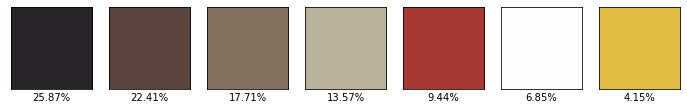

In [49]:
block = np.ones((50,50,3),dtype='uint')

plt.figure(figsize=(12,8))
for i in range(clusters):
    plt.subplot(1,clusters,i+1)
    block[:] = pnc[i][1][::-1] 
    plt.imshow(block)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(str(round(pnc[i][0]*100,2))+'%')
bar = np.ones((50,500,3),dtype='uint')


([], [])

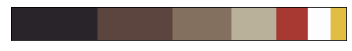

In [50]:
start = 0
i = 1
for p,c in pnc:
    end = start+int(p*bar.shape[1])
    if i==clusters:
        bar[:,start:] = c[::-1]
    else:
        bar[:,start:end] = c[::-1]
    start = end
    i+=1
plt.imshow(bar)
plt.xticks([])
plt.yticks([])